# Maximum Likelihood Estimation

Maximum likelihood estimation identifies the parameter values that maximize the probability of observing your actual data, essentially asking "which model settings would make what we actually saw most likely to occur?"

# Graphical Summary

![Fig](./graphical_summary/slides/Slide20.png)

# Key Formula

Maximum Likelihood Estimation (MLE) finds the parameter value that makes our observed data most probable. In other words, say that each model $\text{M}$ has only one parameter $\theta$, and among all possible values of $\theta$, MLE chooses the one that maximizes the likelihood function. For a model with parameter $\theta$ (e.g., the genetic effect $\beta$), the maximum likelihood estimator is:

$$
\hat{\theta} = \underset{\theta \in \Theta}{\operatorname{argmax}} \mathcal{L}(\theta\mid\text{D}) = \underset{\theta \in \Theta}{\operatorname{argmax}} P(\text{D}\mid\theta)
$$

Where:
- $\hat{\theta}$ is our estimated parameter value (the "hat" indicates it's an estimate)
- $\theta$ represents the (general symbol of) parameter we want to estimate (e.g., $\beta$ in our genetic model)
- $\Theta$ is the parameter space - all possible values θ can take
- $\text{D}$ is our observed data
- $\operatorname{argmax}$ means "the argument (value of θ) that maximizes the function"

# Technical Details

## Work with Log-Likelihood

We have introduced log-likelihood before:

$$
\ell(\theta \mid \text{D}) = \ln \mathcal{L}(\theta \mid \text{D})
$$

Since the logarithm is a monotonic function, the maximum of $\ell(\theta \mid \text{D})$ occurs at the same value of $\theta$ as does the maximum of $\mathcal{L}(\theta \mid \text{D})$. This transformation is particularly useful because:

1. **Numerical stability**: Likelihood values can be extremely small, leading to numerical underflow
2. **Computational convenience**: Products become sums, which are easier to work with
3. **Mathematical tractability**: Many probability distributions have simpler derivatives in log form

## Likelihood Equations

If $\ell(\theta \mid \text{D})$ is differentiable in $\Theta$, sufficient conditions for the occurrence of a maximum (or minimum) are:

$$
\frac{\partial \ell(\theta \mid \text{D})}{\partial \theta} = 0
$$

These are known as the **likelihood equations** or **score equations**. Solving these equations gives us the maximum likelihood estimator $\hat{\theta}$.

## Independent and Identically Distributed (IID) Data

If the data are independent and identically distributed, then we have:

$$
\mathcal{L}(\theta \mid \text{D}) = \prod_{i=1}^{n} P(\text{D}_i \mid \theta)
$$

Taking the log-likelihood:

$$
\ell(\theta \mid \text{D}) = \sum_{i=1}^{n} \ln P(\text{D}_i \mid \theta)
$$

This decomposition is fundamental because it transforms the product of individual probabilities into a sum of log-probabilities, making both computation and differentiation much more manageable.

The IID assumption is crucial in genetics because it allows us to treat each individual's genotype-phenotype observation as independent, enabling us to multiply their individual likelihoods to get the overall likelihood for our dataset.

# Example

This example demonstrates how to calculate the maximum likelihood estimate (MLE) of allele frequency using genetic variant data. We will use a single genetic variant to show how MLE works in practice.


- Related topics:
  - [likelihood](https://gaow.github.io/statgen-prerequisites/likelihood.html)
  - [minor allele frequency](https://gaow.github.io/statgen-prerequisites/minor_allele_frequency.html)

### Calculate MLE From Likelihood Function

In [1]:
# Clear the environment
rm(list = ls())

# Define genotypes for 5 individuals at 1 variant
# Observed genotypes: CC, TT, CT, CC, CC
genotypes <- c("CC", "TT", "CT", "CC", "CC")
names(genotypes) <- paste("Individual", 1:5)

# Define alleles for this variant
alt_allele <- "T"  # alternative allele
ref_allele <- "C"  # reference allele

We observed genotype data for five individuals: CC, TT, CT, CC, and CC (this is our observed data $\text{D}$). We want to estimate the frequency of the alternative allele `T` for this variant.

Let $f_T$ denote the true frequency of the `T` allele. For each $f_T \in [0,1]$, let $\text{M}_{f_T}$ denote the model where the true frequency of the `T` allele is $f_T$.

From our observation, we see that 3 out of 10 alleles (2 alleles per individual since humans are diploid) carry the `T` allele.


Then we can calculate the likelihood model $\text{M}_{f_T}$ is, by definition:

$$
\mathcal{L}(\text{M}_{f_T} \mid \text{D}) = P(\text{D} \mid \text{M}_{f_T})
$$

For each genotype, the probabilities under Hardy-Weinberg equilibrium are:
- CC: $(1-f_T)^2$
- TT: $f_T^2$ 
- CT: $2f_T(1-f_T)$

Therefore, the likelihood is:
$$
\mathcal{L}(\text{M}_{f_T} \mid \text{D}) = (1-f_T)^2 \times f_T^2 \times 2f_T(1-f_T) \times (1-f_T)^2 \times (1-f_T)^2 = 2f_T^3(1-f_T)^7
$$

When computing likelihoods for parametric models, we often use the parameter value to denote the model. So instead of $\mathcal{L}(\text{M}_{f_T} \mid \text{D})$, we write $\mathcal{L}(f_T \mid \text{D})$:

$$
\mathcal{L}(f_T \mid \text{D}) = 2f_T^3(1-f_T)^7
$$


We then plot the likelihood function as follows:

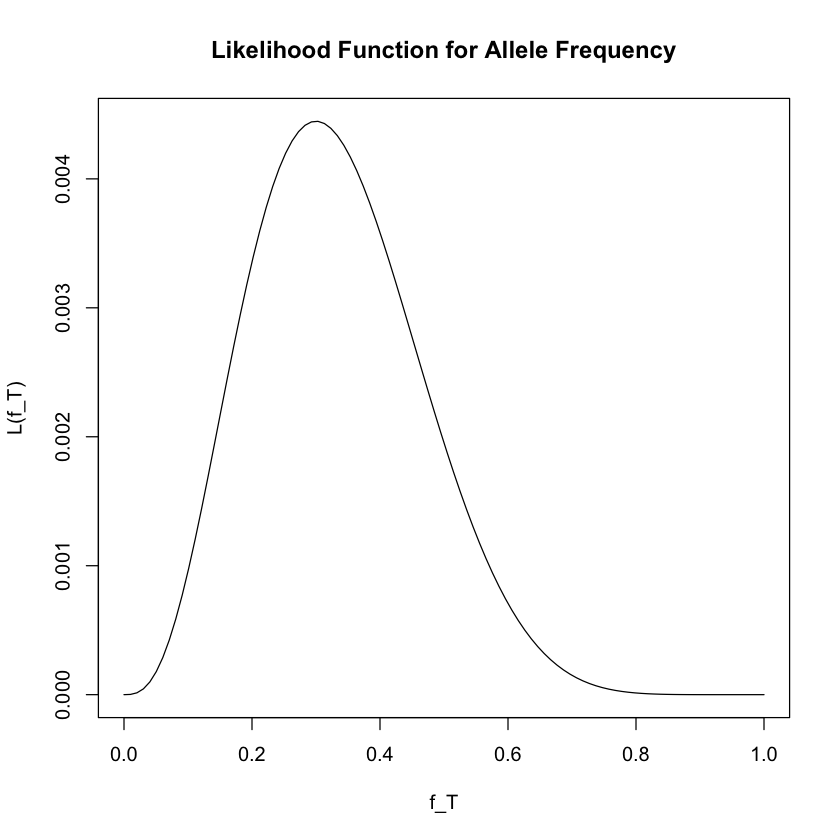

In [4]:
# Plot the likelihood function
f_T <- seq(0, 1, length = 100)
L <- function(f_T) {
    2 * f_T^3 * (1 - f_T)^7
}

plot(f_T, L(f_T), ylab = "L(f_T)", xlab = "f_T", type = "l", 
     main = "Likelihood Function for Allele Frequency")

The value of $f_T$ that maximizes the likelihood function is the **maximum likelihood estimate**, denoted $\hat{f_T}$:

$$
\hat{f_T} = \underset{f_T \in [0,1]}{\operatorname{argmax}} \mathcal{L}(f_T \mid \text{D})
$$

From the plot, we can see that the maximum likelihood estimate is $\hat{f_T} = 0.3$, which corresponds to our intuition (3 out of 10 observed alleles were `T`).


### Calculate MLE From Log-likelihood Function

It is often convenient to work with the log-likelihood function, denoted $\ell(f_T \mid \text{D})$:

$$
\ell(f_T \mid \text{D}) = \ln \mathcal{L}(f_T \mid \text{D}) = \ln(2) + 3\ln(f_T) + 7\ln(1-f_T)
$$


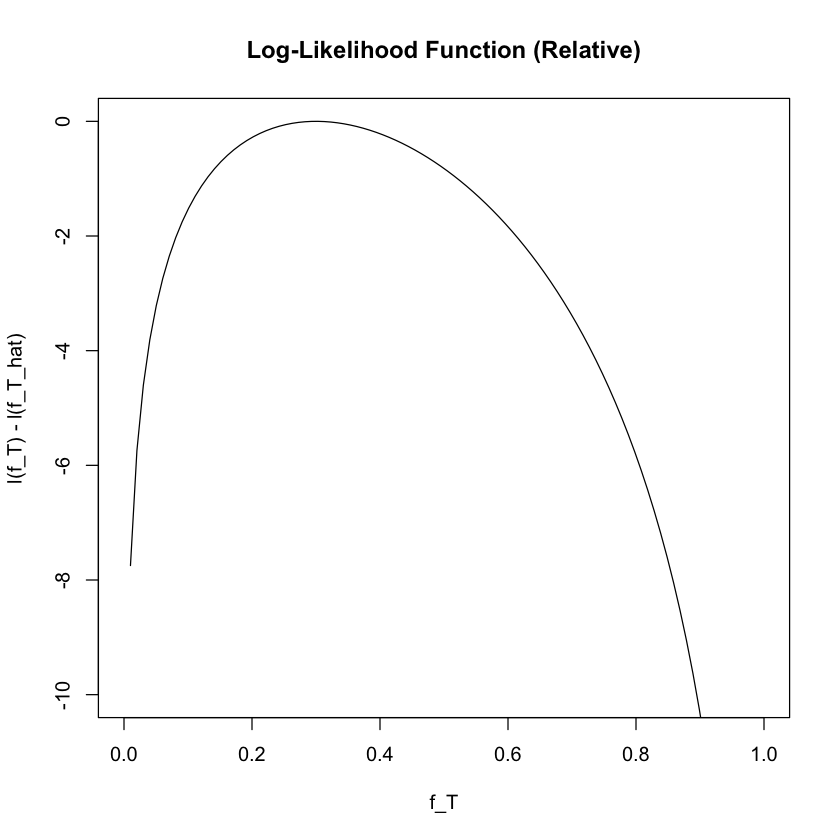

In [5]:
# Plot the log-likelihood function (relative to maximum)
l <- function(f_T) {
    log(2) + 3 * log(f_T) + 7 * log(1 - f_T)
}

plot(f_T, l(f_T) - l(0.3), ylab = "l(f_T) - l(f_T_hat)", xlab = "f_T", 
     type = "l", ylim = c(-10, 0), main = "Log-Likelihood Function (Relative)")

Changes in the log-likelihood function are measured in "log-likelihood units." For example, the difference in support between $f_T = 0.3$ and $f_T = 0.35$ is $\ell(0.3 \mid \text{D}) - \ell(0.35 \mid \text{D}) = 0.563$ log-likelihood units.


## Analytical Solution

In this simple case, we can calculate $\hat{f_T}$ analytically using calculus:

**Step 1**: Take the natural logarithm of the likelihood function:
$$
\ell(f_T \mid \text{D}) = \ln(2) + 3\ln(f_T) + 7\ln(1-f_T)
$$

**Step 2**: Find the critical point by taking the derivative and setting it to zero:
$$
\frac{d\ell(f_T \mid \text{D})}{df_T} = \frac{3}{f_T} - \frac{7}{1-f_T} = 0
$$

**Step 3**: Solve for $f_T$:
$$
\frac{3}{f_T} = \frac{7}{1-f_T}
$$
$$
3(1-f_T) = 7f_T
$$
$$
3 - 3f_T = 7f_T
$$
$$
3 = 10f_T
$$
$$
f_T = \frac{3}{10} = 0.3
$$

**Step 4**: Verify it's a maximum by checking the second derivative:
$$
\frac{d^2\ell(f_T \mid \text{D})}{df_T^2} = -\frac{3}{f_T^2} - \frac{7}{(1-f_T)^2} < 0
$$

This is always negative for $f_T \in (0,1)$, confirming we have a maximum.

# Supplementary

## Graphical Summary

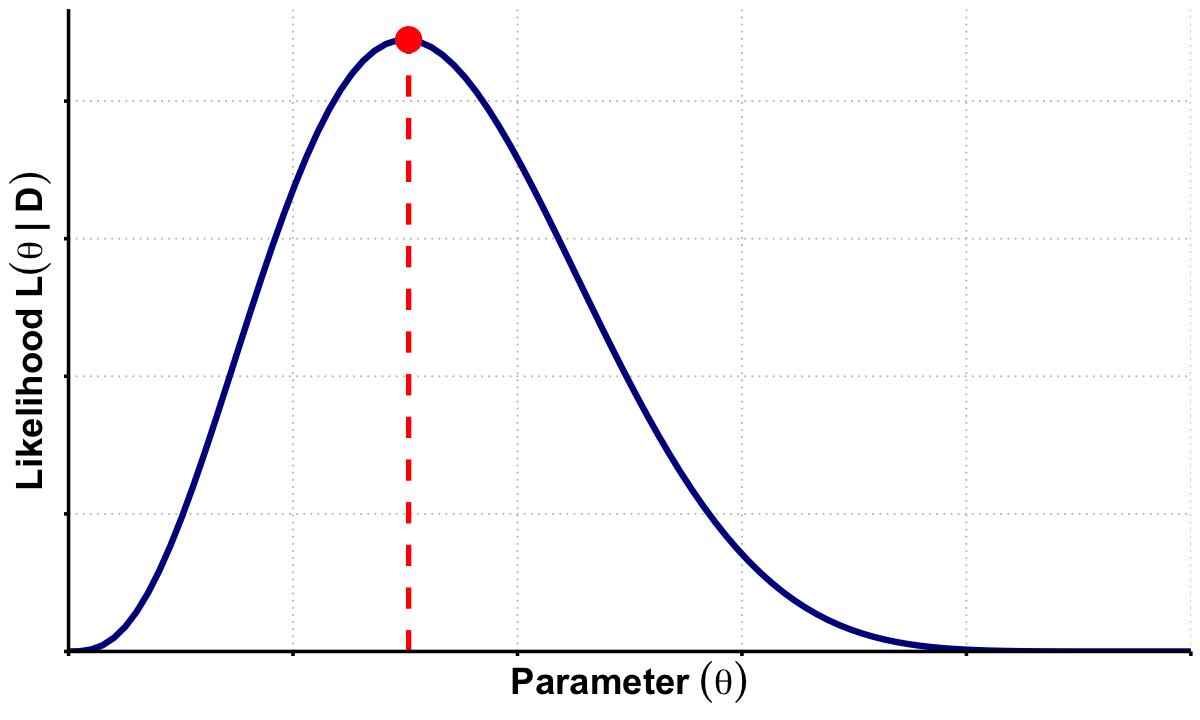

In [7]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)

# Likelihood function and evaluation
q_vals <- seq(0, 1, length = 100)
likelihood_vals <- q_vals^3 * (1 - q_vals)^7
df_lik <- data.frame(q = q_vals, Likelihood = likelihood_vals)

# Find peak location and value
q_peak <- q_vals[which.max(likelihood_vals)]
max_lik <- max(likelihood_vals)

# Create the MLE plot with no axis text and larger axis titles
p_mle <- ggplot(df_lik, aes(x = q, y = Likelihood)) +
  geom_line(color = "darkblue", linewidth = 1.8) +
  annotate("segment", x = q_peak, xend = q_peak, y = 0, yend = max_lik,
           color = "red", linetype = "dashed", linewidth = 1.5) +
  annotate("point", x = q_peak, y = max_lik, color = "red", size = 7) +  # Larger peak point
  labs(x = expression(bold(Parameter~(theta))), 
       y = expression(bold(Likelihood~L(theta~'|'~D)))) +
  scale_x_continuous(breaks = seq(0, 1, 0.2), limits = c(0, 1), expand = c(0, 0)) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
  theme_minimal() +
  theme(
    text = element_text(size = 14, face = "bold"),
    plot.title = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.title.x = element_text(size = 22, face = "bold"),  # Slightly larger
    axis.title.y = element_text(size = 22, face = "bold"),  # Slightly larger
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 1),
    axis.ticks = element_line(linewidth = 1),
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  )

# Display and save the plot
print(p_mle)

ggsave("./cartoons/MLE.png", plot = p_mle, 
       width = 10, height = 6, 
       bg = "transparent", 
       dpi = 300)
